In [1]:
import time
import matplotlib.pyplot as plt

# Environments
from environments.ACOEnvironment import ACOEnvironment
from environments.Environment import Environment

# Algorithms
from algorithms.AntColonyOptimization import AntColonyOptimization # ACO
from algorithms.ADPE_AntColonyOptimization import ADPE_AntColonyOptimization # ADPE ACO
from algorithms.ParticleSwarmOptimization import ParticleSwarmOptimization # PSO
from algorithms.FireflyAlgorithm import FireflyAlgorithm # AFFA

# Helper classes
from helpers.PathSpecification import PathSpecification
from helpers.Coordinate import Coordinate

# Creating an environment

We create the environment that will be used by all the nature-inspired algorithms.

We start by declaring the parameters:

In [2]:
# Please keep your parameters for the environment easily changeable here

# Environment parameters
width = 40
height = 40
start_pos = Coordinate(2, 2)
end_pos = Coordinate(38, 38)
obstacles = [(2.5, 0.15), (1.5, 0.05)]  # We generate an obstacle of radius 2 with frequency 11% and obstacles of radius 1 with frequency 1.8%
obstacle_distance = 5

# Algorithm parameters
step_size = 1
trail = 1.0
convergence_iter = 3500

Next, we create the environment and visualize it.

Finished preparing the environment


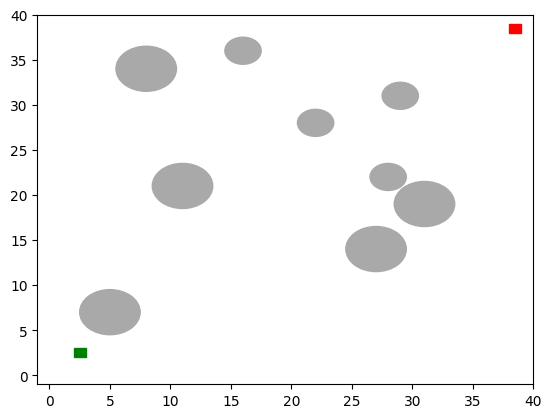

In [3]:
# Use the environment variables already declared above
# This environment will be used by all the algorithms
environment = Environment.create_environment(width, height, obstacles, start_pos=start_pos, end_pos=end_pos)
# Initialize the path specification for the path to be found
spec = PathSpecification(start_pos, end_pos)

# Show the environment
environment.visualize()

# Ant Colony Optimization

First, we initialize the variables we will be using for ACO.

In [4]:
# Please keep your parameters for the ACO easily changeable here
aco_agents_per_generation = 30
aco_no_generations = 50
aco_q = 500
aco_evaporation = 0.5
aco_no_change_iter = 30

Next, we build the environment and other necessary objects. ACO, unlike the other algorithms, requires a custom environment object.

In [5]:
# Construct the optimization objects
aco_environment = ACOEnvironment.create_from_environment(environment)
aco = AntColonyOptimization(aco_environment, aco_agents_per_generation, aco_no_generations, aco_q, aco_evaporation, convergence_iter, aco_no_change_iter, trail, step_size, num_processes=6)

Next, we run the ACO algorithm and print the results.

Started ACO
Generation 0
Routes found so far: 30
Best route's length: 418


Generation 1
Routes found so far: 30
Best route's length: 368


Generation 2
Routes found so far: 30
Best route's length: 348


Generation 3
Routes found so far: 30
Best route's length: 245


Generation 4
Routes found so far: 30
Best route's length: 245


Generation 5
Routes found so far: 30
Best route's length: 245


Generation 6
Routes found so far: 30
Best route's length: 245


Generation 7
Routes found so far: 30
Best route's length: 245


Generation 8
Routes found so far: 30
Best route's length: 245


Generation 9
Routes found so far: 30
Best route's length: 245


Generation 10
Routes found so far: 30
Best route's length: 245


Generation 11
Routes found so far: 30
Best route's length: 245


Generation 12
Routes found so far: 30
Best route's length: 245


Generation 13
Routes found so far: 30
Best route's length: 245


Generation 14
Routes found so far: 30
Best route's length: 245


Generation 15
Routes fo

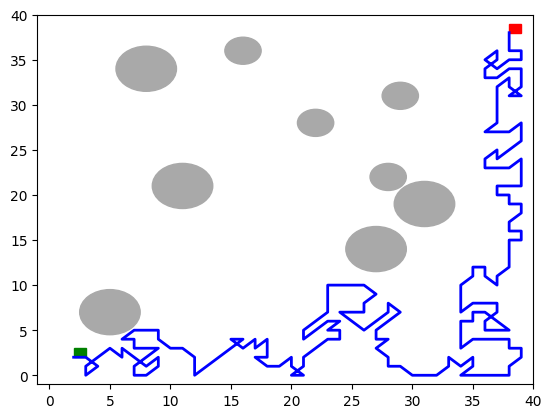

In [6]:
# Save starting time
start_time = int(round(time.time() * 1000))

print("Started ACO")

# Run ACO
shortest_path, checkpoints = aco.run(spec, print_progress=True)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_path.write_to_file("./../data/hard_solution.txt")

# Print path size
print("Path size: " + str(shortest_path.size()))

# Print path
aco_environment.visualize(shortest_path)

#### Speed of convergence

Finished preparing the board
Generation 0
Routes found so far: 20
Best route's length: 322


Generation 1
Routes found so far: 20
Best route's length: 316


Generation 2
Routes found so far: 20
Best route's length: 238


Generation 3
Routes found so far: 20
Best route's length: 238


Generation 4
Routes found so far: 20
Best route's length: 212


Generation 5
Routes found so far: 20
Best route's length: 212


Generation 6
Routes found so far: 20
Best route's length: 212


Generation 7
Routes found so far: 20
Best route's length: 120


Generation 8
Routes found so far: 20
Best route's length: 120


Generation 9
Routes found so far: 20
Best route's length: 120


Generation 10
Routes found so far: 20
Best route's length: 120


Generation 11
Routes found so far: 20
Best route's length: 120


Generation 12
Routes found so far: 20
Best route's length: 120


Generation 13
Routes found so far: 20
Best route's length: 120


Generation 14
Routes found so far: 20
Best route's length: 120


Genera

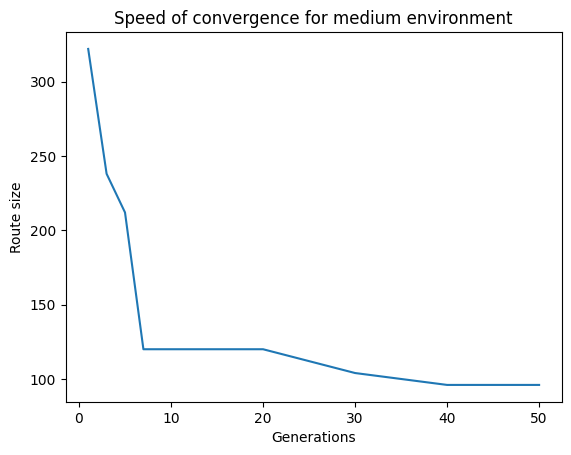

In [8]:
aco_agents_per_generation = 20
aco_no_generations = 50
aco_q = 200
aco_evaporation = 0.2
new_convergence_iter = 10000
aco_no_change_iter = 50
aco_sigma_elite = 50

# Create environment
aco_environment.reset()

# Start ACO Algorithm
aco = AntColonyOptimization(aco_environment, aco_agents_per_generation, aco_no_generations, aco_q, aco_evaporation, new_convergence_iter, aco_no_change_iter, trail, aco_sigma_elite, num_processes=6)
shortest_path, checkpoints = aco.run(spec)

plt.plot([1, 3, 5, 7, 10, 20, 30, 40, 50], checkpoints)
plt.xlabel("Generations")
plt.ylabel("Path size")
plt.title("Speed of convergence for medium environment")
plt.show()

# Adaptive Dynamic Probabilistic Ant Colony Optimization

We start by declaring an additional parameter for ADPE ACO:

In [7]:
aco_sigma_elite = 50

We build the environment and other necessary objects.

In [8]:
# Construct the optimization objects
aco_environment = ACOEnvironment.create_from_environment(environment)
adpe_aco = ADPE_AntColonyOptimization(aco_environment, aco_agents_per_generation, aco_no_generations, aco_q, aco_evaporation, convergence_iter, aco_no_change_iter, trail, aco_sigma_elite, step_size, num_processes=6)

Next, we run the ADPE ACO algorithm and print the results.

Started ACO
Generation 0
Routes found so far: 30
Best route's length: 418


Generation 1
Routes found so far: 30
Best route's length: 368


Generation 2
Routes found so far: 30
Best route's length: 348


Generation 3
Routes found so far: 30
Best route's length: 245


Generation 4
Routes found so far: 30
Best route's length: 245


Generation 5
Routes found so far: 30
Best route's length: 245


Generation 6
Routes found so far: 30
Best route's length: 245


Generation 7
Routes found so far: 30
Best route's length: 245


Generation 8
Routes found so far: 30
Best route's length: 245


Generation 9
Routes found so far: 30
Best route's length: 231


Generation 10
Routes found so far: 30
Best route's length: 231


Generation 11
Routes found so far: 30
Best route's length: 231


Generation 12
Routes found so far: 30
Best route's length: 231


Generation 13
Routes found so far: 30
Best route's length: 231


Generation 14
Routes found so far: 30
Best route's length: 231


Generation 15
Routes fo

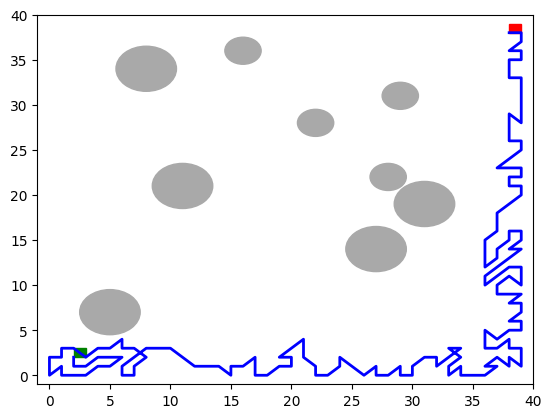

In [9]:
# Save starting time
start_time = int(round(time.time() * 1000))

print("Started ACO")

# Run ADPE ACO
shortest_path, checkpoints = adpe_aco.run(spec, print_progress=True)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_path.write_to_file("./../data/hard_solution.txt")

# Print path size
print("Path size: " + str(shortest_path.size()))

# Print path
aco_environment.visualize(shortest_path)

# Particle Swarm Optimization

We declare the necessary parameters for the Particle Swarm Optimization algorithm.

In [10]:
# Parameters specifically for PSO
pso_num_iterations = 500  # To let Lévy flights get out of local optima eventually
pso_inertia_weight = 1.0  # Currently irrelevant as adapted from acceleration coefficients, but given for completeness
pso_num_particles = 100  # The number of particles generated initially to run pso on

Next, we run the Particle Swarm Optimization algorithm and print the results.

Started PSO
2.668896915998583, 2.742040466242671
3.2043502897313827, 3.336045404212425
4.862605923044692, 4.448890692721335
5.97412284852536, 4.393782824058309
7.01217889455017, 5.017471379292098
7.97412284852536, 6.309360380396194
9.58027022358627, 7.847710312315039
11.130181692957045, 9.4172148546895
12.738441837966294, 11.025474999698748
13.880341501417217, 12.52433215509557
15.410296623571224, 13.820259407416431
16.78611951006628, 15.287407013835546
18.374935004937715, 16.780170168873443
19.733988008828224, 18.373546092785656
21.308159273795102, 19.901663789371273
22.92404988680231, 21.517554402378483
24.369942406239055, 22.93954198947047
25.996230704784093, 24.511317172810735
27.6037588874528, 25.887970430494004
29.054331759964107, 27.596454354502196
30.49187447495174, 28.879625980195815
32.114576990393225, 30.4648554153358
33.39070074207257, 31.800069536506342
34.9789626385848, 33.43304940204724
36.29753990368882, 34.96837325466461
37.924909926315756, 36.59574327729155
38.6689957

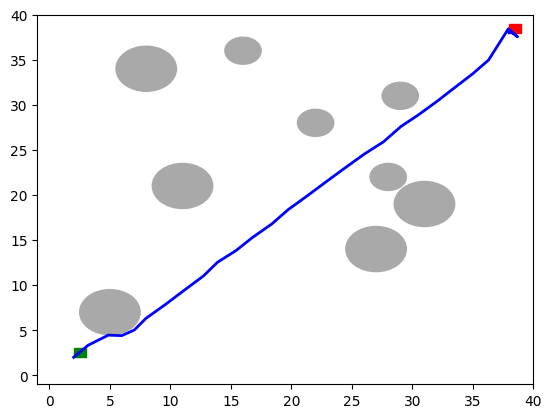

In [11]:
# Initialize PSO
pso = ParticleSwarmOptimization(environment, spec, pso_num_particles, convergence_iter, trail, step_size, pso_inertia_weight, pso_num_iterations)

# Save starting time
start_time = int(round(time.time() * 1000))

print("Started PSO")

# Run PSO
shortest_path, checkpoints = pso.run()

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_path.write_to_file("./../data/hard_solution.txt")

# Print path size; not really relevant for pso as it adds global bests and may get stuck for a bit
# Normally measured in path length or time taken better
print("Path size: " + str(shortest_path.size()))

# Print path
environment.visualize(shortest_path)

# Firefly algorithm

We declare the necessary parameters for the Firefly algorithm.

In [12]:
fa_population_size = 100
fa_alpha_init = 1  # Є [0,1]
fa_alpha_final = 0.01  # Є [0,1]
fa_beta = 1  # Є [0,1]
fa_gamma_init = 0.1  # it is suggested Є [0,10]
fa_gamma_final = 5  # it is suggested Є [0,10]
fa_max_iter = 100

Next, we run the Firefly algorithm (AFFA) and print the results.

Started FA
-50.900364202998965
-50.799048878828486
-50.75061025106381
-48.12716437447795
-48.06797298426834
-48.03002322870186
-45.26738451383648
-45.260497788969076
-45.244079201672115
-45.21951783329407
-42.659555513338454
-42.61371275156077
-38.84725075648496
-38.83133640063662
-38.810287344033924
-36.40131439013395
-36.38747739224523
-36.36222474890331
-36.30849536163826
-36.21652106021267
-36.17160422829901
-36.13985955587149
-34.11903135154089
-34.104341187288384
-32.92427576393841
-31.59827619407856
-31.545053107661815
-31.51717917585364
-29.867735657048975
-29.774724538407387
-29.7720634466752
-29.67153347852165
-28.823221930505444
-28.810746392125342
-28.785900917345796
-28.729555466888336
-28.665791488182705
-28.606299515619284
-27.025120004592242
-26.920586911642047
-23.41852259870415
-23.384049493689822
-21.068823906486433
-21.06683273288773
-21.01438406272227
-17.55604969719296
-15.438415506071532
-11.664083981016608
-9.485336984533124
-8.357128400722807
-8.264251322910871

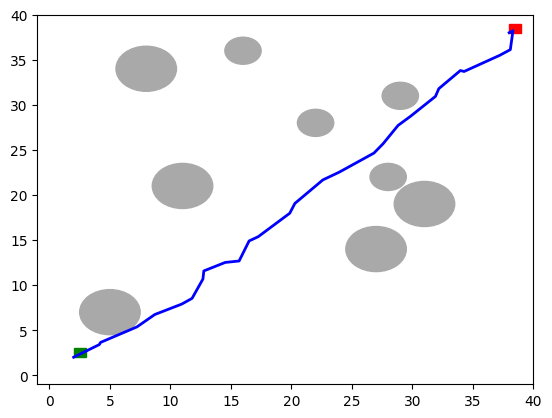

In [13]:
# Initialize FA
fa = FireflyAlgorithm(environment, spec, fa_population_size, fa_alpha_init, fa_alpha_final, fa_gamma_init, fa_gamma_final, fa_beta, fa_max_iter, obstacle_distance)

# Save starting time
start_time = int(round(time.time() * 1000))

print("Started FA")

# Run FA
shortest_path, checkpoints = fa.run()

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_path.write_to_file("./../data/hard_solution.txt")

# Print path size
# Normally measured in path length or time taken better
print("Path size: " + str(shortest_path.size()))

# Print path
environment.visualize(shortest_path)